<a href="https://colab.research.google.com/github/ZandomeneghiChiara/MentalHealth_SR/blob/main/MentalHealth_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mental health encompasses our emotional, psychological, and social well-being, influencing our thoughts,
feelings, actions, stress management, relationships, and decision-making throughout life.

 Mental health is vital for overall well-being, as it impacts physical health and vice versa.
 Depression, for instance, heightens the risk of chronic physical ailments like diabetes and heart disease, while enduring physical conditions can raise the likelihood of mental health issues.

In [95]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 1 - Chosen datasets

In [96]:
# Reading datasets on mental health
data1 = pd.read_csv("1_Mental_IllnessesPrevalence.csv")

In [97]:
df1 = pd.DataFrame(data1)

# 2 - Description of All Datasets

In [98]:
def describe(df):
    # Initialize lists to store information
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []

    # Iterate through each column in the DataFrame
    for column in df.columns:
        variables.append(column)
        dtypes.append(df[column].dtype)
        count.append(len(df[column]))
        unique.append(len(df[column].unique()))
        missing.append(df[column].isna().sum())

    # Create a DataFrame to store the summary statistics
    summary_df = pd.DataFrame({
        'Variable': variables,
        'Data Type': dtypes,
        'Count': count,
        'Unique Values': unique,
        'Missing Values': missing
    })

    return summary_df

In [99]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 3 - Output of Describes

In [100]:
def print_describe_table(header, dataframe):
    print(color.BOLD + color.BLUE + color.UNDERLINE + f'"{header}"' + color.END)
    print(describe(dataframe))
    print("\n")

print_describe_table("Mental illness dataframe", df1)

"Mental illness dataframe"
                                            Variable Data Type  Count  \
0                                             Entity    object   6420   
1                                               Code    object   6420   
2                                               Year     int64   6420   
3  Schizophrenia disorders (share of population) ...   float64   6420   
4  Depressive disorders (share of population) - S...   float64   6420   
5  Anxiety disorders (share of population) - Sex:...   float64   6420   
6  Bipolar disorders (share of population) - Sex:...   float64   6420   
7  Eating disorders (share of population) - Sex: ...   float64   6420   

   Unique Values  Missing Values  
0            214               0  
1            206             270  
2             30               0  
3           6406               0  
4           6416               0  
5           6417               0  
6           6385               0  
7           6417               0  


# 4 EDA

In [101]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [102]:
df1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [103]:
df1.tail()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909
6419,Zimbabwe,ZWE,2019,0.202482,3.395476,3.137017,0.538580,0.098295


In [104]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [105]:
df1.drop('Code', axis=1, inplace=True)
print(df1)

           Entity  Year  Schizophrenia disorders  Depressive disorders  \
0     Afghanistan  1990                 0.223206              4.996118   
1     Afghanistan  1991                 0.222454              4.989290   
2     Afghanistan  1992                 0.221751              4.981346   
3     Afghanistan  1993                 0.220987              4.976958   
4     Afghanistan  1994                 0.220183              4.977782   
...           ...   ...                      ...                   ...   
6415     Zimbabwe  2015                 0.201042              3.407624   
6416     Zimbabwe  2016                 0.201319              3.410755   
6417     Zimbabwe  2017                 0.201639              3.411965   
6418     Zimbabwe  2018                 0.201976              3.406929   
6419     Zimbabwe  2019                 0.202482              3.395476   

      Anxiety disorders  Bipolar disorders  Eating disorders  
0              4.713314           0.703023      

In [106]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


## 4.2 - Some plots

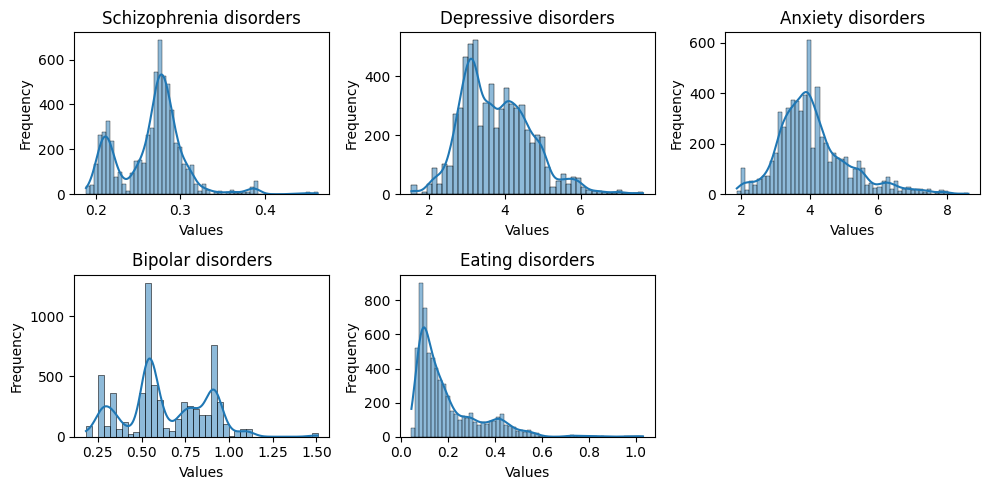

In [107]:
# Histograms
plt.figure(figsize=(10, 5))

# Define subplot grid
grid_size = (2, 3)

# Plot histograms
for i, disorder in enumerate(df1_variables.columns):
    plt.subplot2grid(grid_size, divmod(i, grid_size[1]))
    sns.histplot(df1_variables[disorder], kde=True)
    plt.title(disorder)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

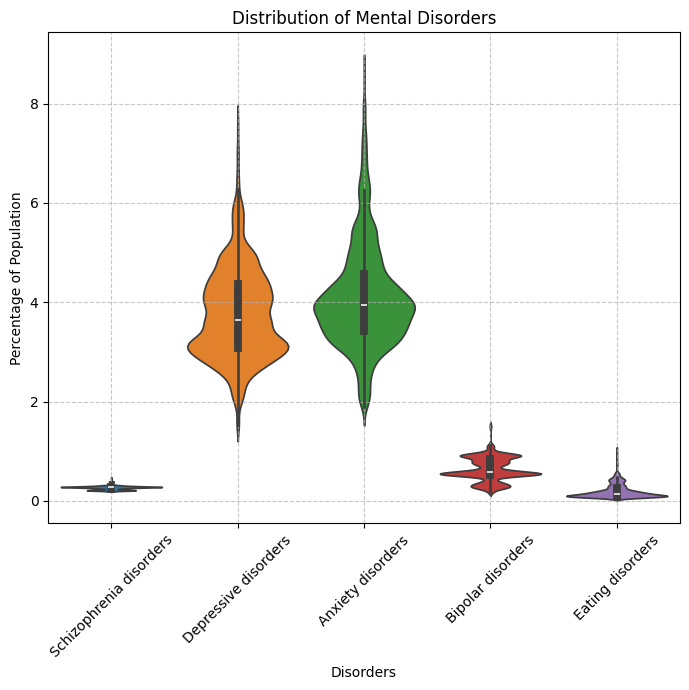

In [145]:
# Boxplots
plt.figure(figsize=(7, 7))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Set color palette for better differentiation

# Plot violinplot
sns.violinplot(data=df1_variables, palette=colors)

# Add title and axis labels
plt.title("Distribution of Mental Disorders")
plt.ylabel("Percentage of Population")
plt.xlabel("Disorders")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

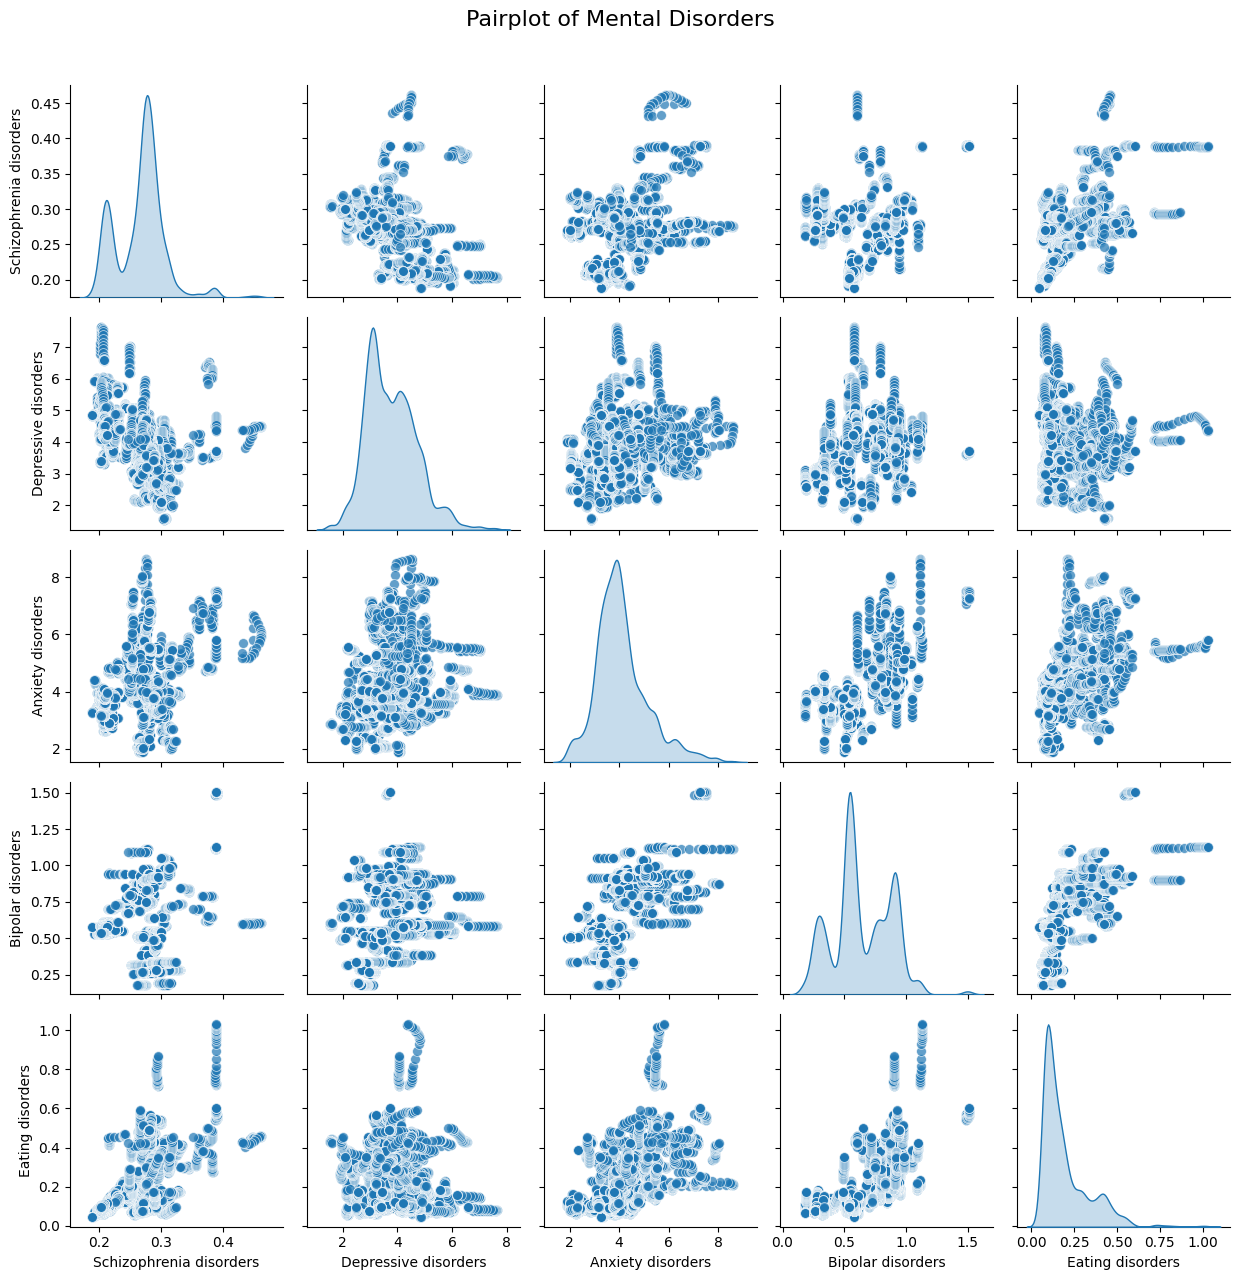

In [109]:
# Scatterplot matrix
plt.figure(figsize=(5, 5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]    # Define custom color palette

# Plot pairplot with custom settings
sns.pairplot(df1_variables, diag_kind='kde', palette=colors, markers='o', plot_kws={'alpha':0.7, 's': 50})

plt.suptitle("Pairplot of Mental Disorders", y=1.02, fontsize=16)

plt.tight_layout()

plt.show()

## 4.3 -  Correlation

In [110]:
# Calculate the correlation matrix
Corrmat = df1_variables.corr()

# Display the correlation matrix as a table
Corrmat.style.format(precision=2)

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
Schizophrenia disorders,1.00,-0.47,0.30,0.12,0.50
Depressive disorders,-0.47,1.00,0.11,0.15,-0.05
Anxiety disorders,0.30,0.11,1.00,0.58,0.59
Bipolar disorders,0.12,0.15,0.58,1.00,0.68
Eating disorders,0.50,-0.05,0.59,0.68,1.00


<Axes: >

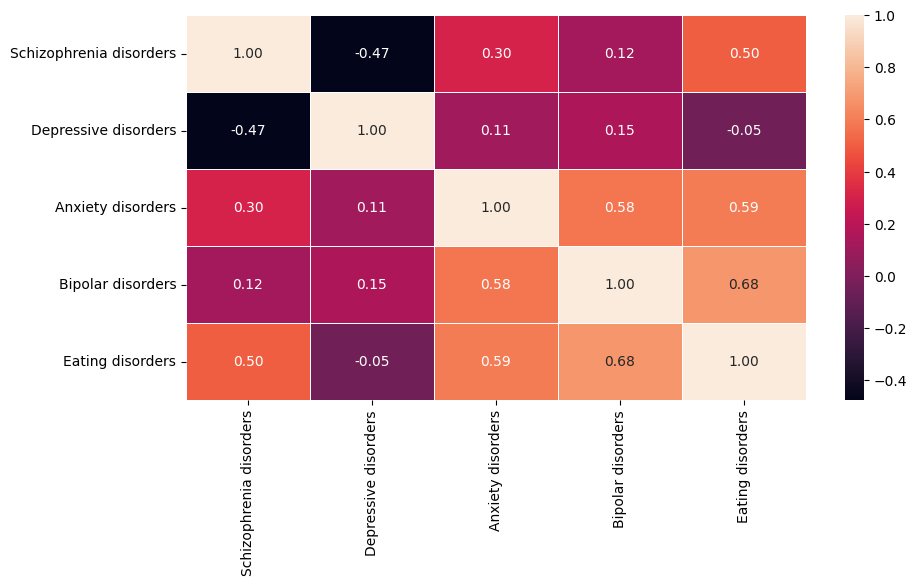

In [111]:
Corrmat = df1_variables.corr()
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

This correlation table presents the relationships between different psychological disorders. Notably, it indicates moderate to strong correlations between certain disorders, such as schizophrenia and both anxiety and eating disorders, as well as strong correlations between bipolar and eating disorders, and anxiety and bipolar disorders. Conversely, depressive disorders show weaker correlations with other disorders in this context. These insights can help in understanding potential comorbidities and inform treatment approaches.

# 6 - Join the areas

In [112]:
# unique values entity df1
unique_entities = df1['Entity'].unique()
print("Unique values of 'Entity':")
print(unique_entities)

entity_counts = df1['Entity'].value_counts()  # Count the unique values of 'Entity'

# Print the counts
print("Counts of unique values of 'Entity':")
print(entity_counts)

Unique values of 'Entity':
['Afghanistan' 'Africa (IHME GBD)' 'Albania' 'Algeria'
 'America (IHME GBD)' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia (IHME GBD)' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe (IHME GBD)' 'European Union (27)' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guat

In [113]:
# Create a dictionary mapping each entity to its corresponding area
area_mapping = {
    "Northern Africa": ["Algeria", "Egypt", "Libya", "Morocco", "Sudan", "Tunisia"],
    "Western Africa": ["Benin", "Burkina Faso", "Cape Verde", "Cote d'Ivoire", "Gambia",
        "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania",
        "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"],
    "Central Africa": ["Angola", "Cameroon", "Central African Republic", "Chad", "Congo",
        "Democratic Republic of Congo", "Equatorial Guinea", "Gabon", "Sao Tome and Principe"],
    "Eastern Africa": ["Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "Kenya",
        "Madagascar", "Malawi", "Mauritius", "Mozambique", "Rwanda", "Seychelles",
        "Somalia", "South Sudan", "Tanzania", "Uganda", "Zambia", "Zimbabwe"],
    "Southern Africa": ["Botswana", "Eswatini", "Lesotho", "Namibia", "South Africa"],
    "Central Asia": ["Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Uzbekistan"],
    "Eastern Asia": ["China", "Japan", "Mongolia", "North Korea", "South Korea", "Taiwan", "Northern Mariana Islands"],
    "South Asia": ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal",
        "Pakistan", "Sri Lanka"],
    "Southeast Asia": ["Brunei", "Cambodia", "East Timor", "Indonesia", "Laos", "Malaysia",
        "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam",],
    "Western Asia (Middle East)": ["Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Georgia", "Iran", "Iraq",
        "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
        "Saudi Arabia", "Syria", "Turkey", "United Arab Emirates", "Yemen"],
    "Northern Europe": ["Denmark", "Estonia", "Finland", "Iceland", "Ireland", "Latvia",
        "Lithuania", "Norway", "Sweden", "United Kingdom"],
    "Western Europe": ["Austria", "Belgium", "France", "Germany", "Luxembourg", "Netherlands",
        "Switzerland"],
    "Southern Europe": ["Albania", "Andorra", "Bosnia and Herzegovina", "Croatia", "Greece",
        "Italy", "Malta", "Monaco", "Montenegro", "North Macedonia", "Portugal",
        "San Marino", "Serbia", "Slovenia", "Spain"],
    "Eastern Europe": ["Belarus", "Bulgaria", "Czechia", "Hungary", "Moldova", "Poland",
        "Romania", "Russia", "Slovakia", "Ukraine"],
    "Caribbean": ["Antigua and Barbuda", "Bahamas", "Barbados", "Cuba", "Dominica",
        "Dominican Republic", "Grenada", "Haiti", "Jamaica", "Saint Kitts and Nevis",
        "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago"],
    "Central America": ["Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras",
        "Nicaragua", "Panama", "Mexico", "Puerto Rico"],
    "Northern America": ["Canada", "United States", "United States Virgin Islands","Greenland","Bermuda"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
        "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],
    "Oceania": ["Australia", "New Zealand"],
    "Melanesia": ["Fiji", "Papua New Guinea", "Solomon Islands", "Vanuatu"],
    "Micronesia": ["Kiribati", "Marshall Islands", "Micronesia (country)", "Nauru", "Palau","Guam"],
    "Polynesia": ["American Samoa", "Cook Islands", "Niue", "Samoa", "Tokelau",
        "Tonga", "Tuvalu"]
}

In [114]:
# Create the reverse mapping dictionary
reverse_area_mapping = {}

# Iterate through the area_mapping dictionary
for area, entities in area_mapping.items():
    # Iterate through the entities in each area
    for entity in entities:
        # Add the entity as a key and the area as a value to the reverse mapping dictionary
        reverse_area_mapping[entity] = area

# Now you can apply the reverse mapping to the DataFrame
df1['Area'] = df1['Entity'].map(reverse_area_mapping)

# Print the first few rows of df1 to verify the mapping
print(df1.head())

        Entity  Year  Schizophrenia disorders  Depressive disorders  \
0  Afghanistan  1990                 0.223206              4.996118   
1  Afghanistan  1991                 0.222454              4.989290   
2  Afghanistan  1992                 0.221751              4.981346   
3  Afghanistan  1993                 0.220987              4.976958   
4  Afghanistan  1994                 0.220183              4.977782   

   Anxiety disorders  Bipolar disorders  Eating disorders        Area  
0           4.713314           0.703023          0.127700  South Asia  
1           4.702100           0.702069          0.123256  South Asia  
2           4.683743           0.700792          0.118844  South Asia  
3           4.673549           0.700087          0.115089  South Asia  
4           4.670810           0.699898          0.111815  South Asia  


In [115]:
df1.isna().sum()

Entity                       0
Year                         0
Schizophrenia disorders      0
Depressive disorders         0
Anxiety disorders            0
Bipolar disorders            0
Eating disorders             0
Area                       300
dtype: int64

In [116]:
nan_area_rows = df1[df1['Area'].isna()]
unique_entities_nan_area = nan_area_rows['Entity'].unique()

# Print the unique values
print("Unique values of 'Entity' in rows with NaN 'Area' value:")
print(unique_entities_nan_area)

Unique values of 'Entity' in rows with NaN 'Area' value:
['Africa (IHME GBD)' 'America (IHME GBD)' 'Asia (IHME GBD)'
 'Europe (IHME GBD)' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries'
 'Upper-middle-income countries' 'World']


# 7 - Filtered df1

In [117]:
# Drop rows where 'Entity' column contains the specified categories
categories_to_drop = ['Africa (IHME GBD)', 'America (IHME GBD)', 'Asia (IHME GBD)',
    'Europe (IHME GBD)', 'European Union (27)', 'High-income countries',
    'Low-income countries', 'Lower-middle-income countries',
    'Upper-middle-income countries', 'World']
filtered_df1 = df1[~df1['Entity'].isin(categories_to_drop)]

# Print the filtered DataFrame
print(filtered_df1)

           Entity  Year  Schizophrenia disorders  Depressive disorders  \
0     Afghanistan  1990                 0.223206              4.996118   
1     Afghanistan  1991                 0.222454              4.989290   
2     Afghanistan  1992                 0.221751              4.981346   
3     Afghanistan  1993                 0.220987              4.976958   
4     Afghanistan  1994                 0.220183              4.977782   
...           ...   ...                      ...                   ...   
6415     Zimbabwe  2015                 0.201042              3.407624   
6416     Zimbabwe  2016                 0.201319              3.410755   
6417     Zimbabwe  2017                 0.201639              3.411965   
6418     Zimbabwe  2018                 0.201976              3.406929   
6419     Zimbabwe  2019                 0.202482              3.395476   

      Anxiety disorders  Bipolar disorders  Eating disorders            Area  
0              4.713314         

In [118]:
filtered_df1.isna().sum()

Entity                     0
Year                       0
Schizophrenia disorders    0
Depressive disorders       0
Anxiety disorders          0
Bipolar disorders          0
Eating disorders           0
Area                       0
dtype: int64

In [119]:
nan_area_rows = filtered_df1[filtered_df1['Area'].isna()]
unique_entities_nan_area = nan_area_rows['Entity'].unique()

# Print the unique values
print("Unique values of 'Entity' in rows with NaN 'Area' value:")
print(unique_entities_nan_area)

Unique values of 'Entity' in rows with NaN 'Area' value:
[]


In [120]:
filtered_df1

,Entity,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders,Area
0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700,South Asia
1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256,South Asia
2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844,South Asia
3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089,South Asia
4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815,South Asia
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,2015,0.201042,3.407624,3.184012,0.538596,0.095652,Eastern Africa
6416,Zimbabwe,2016,0.201319,3.410755,3.187148,0.538593,0.096662,Eastern Africa
6417,Zimbabwe,2017,0.201639,3.411965,3.188418,0.538589,0.097330,Eastern Africa
6418,Zimbabwe,2018,0.201976,3.406929,3.172111,0.538585,0.097909,Eastern Africa


# 8 - Area Plots

## 8.1 Bar plots

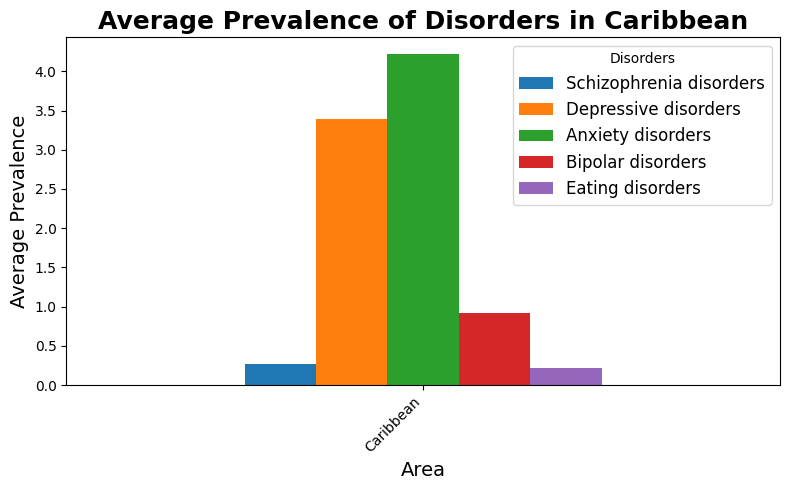

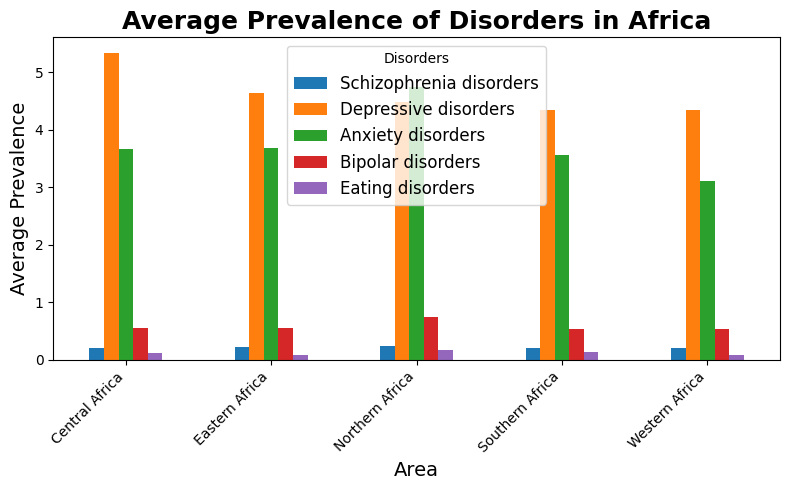

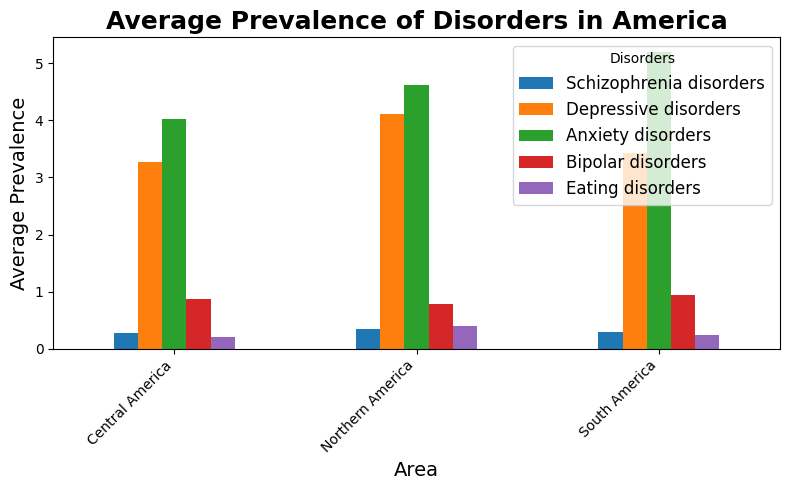

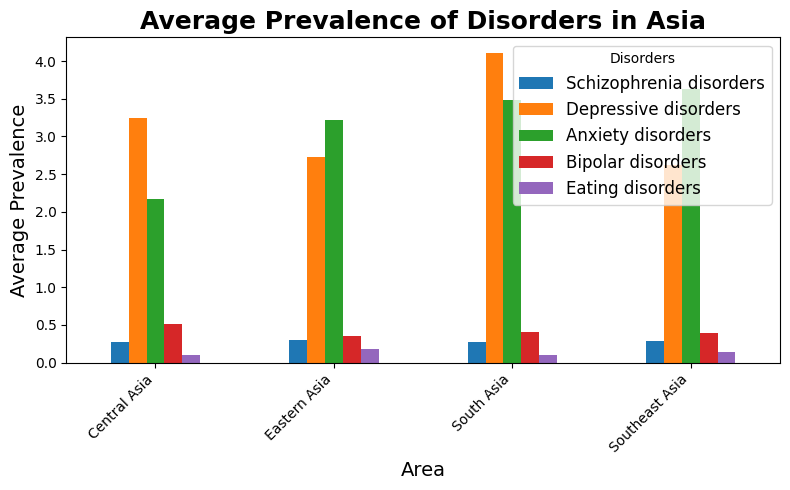

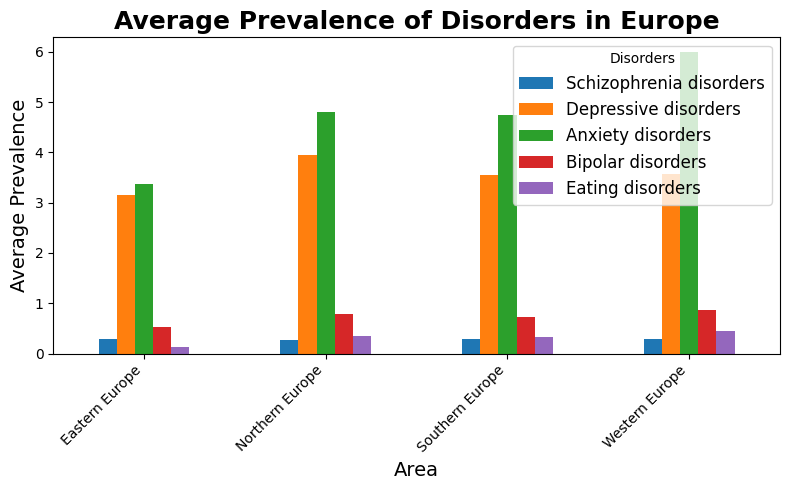

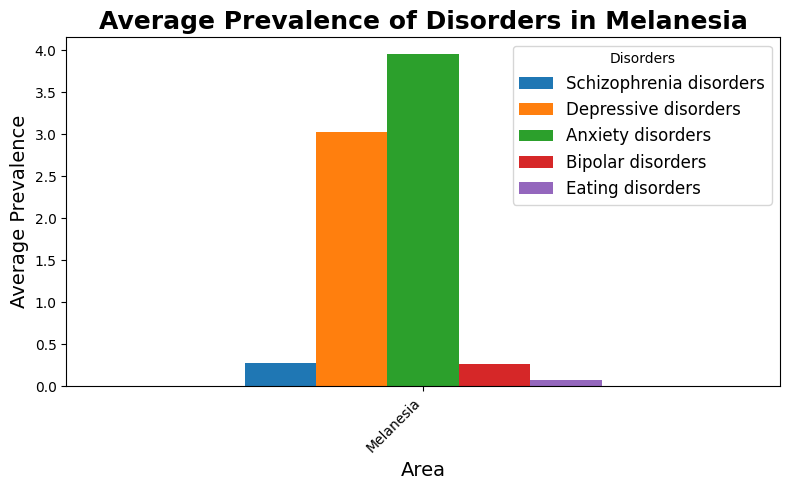

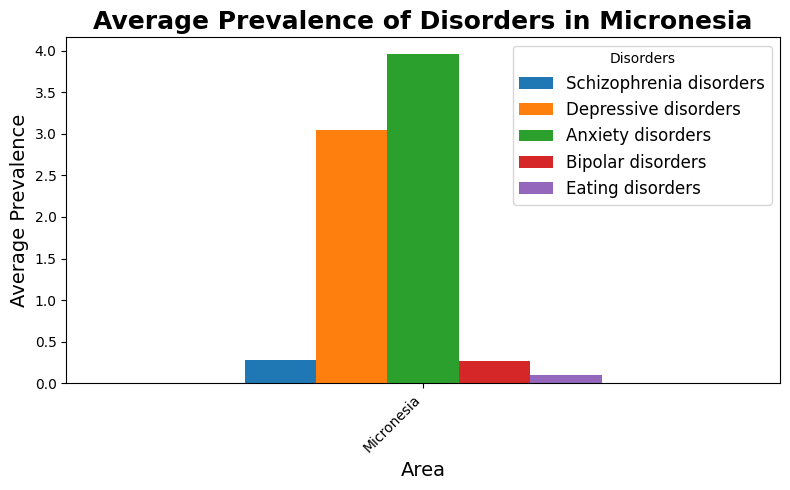

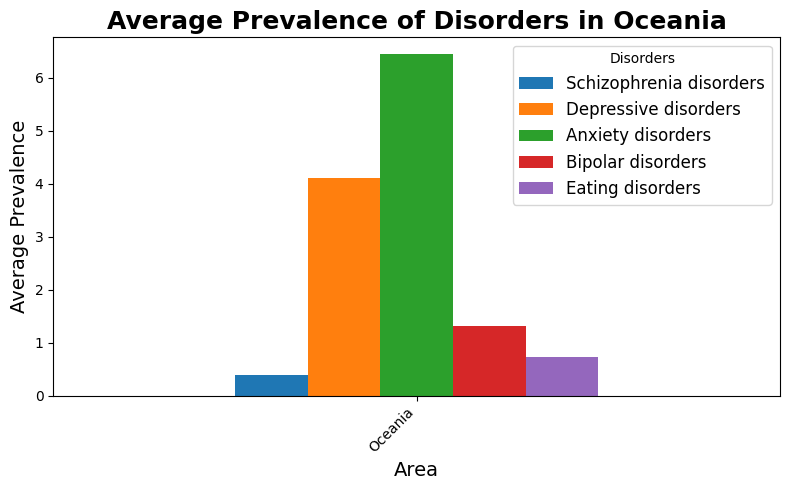

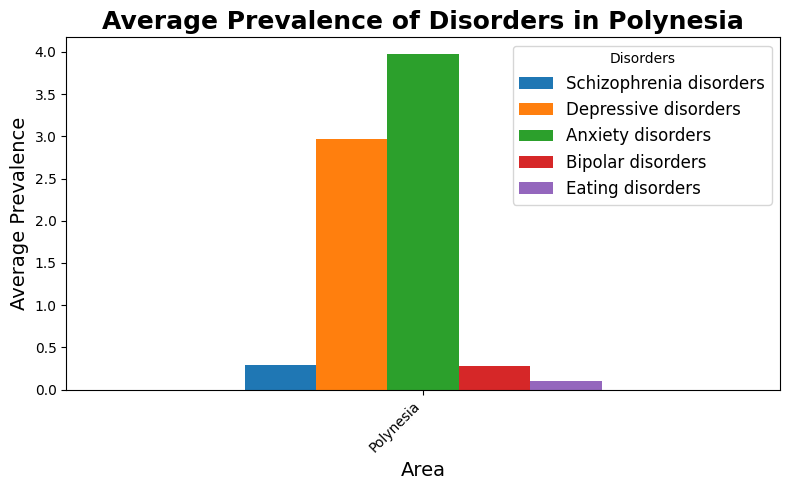

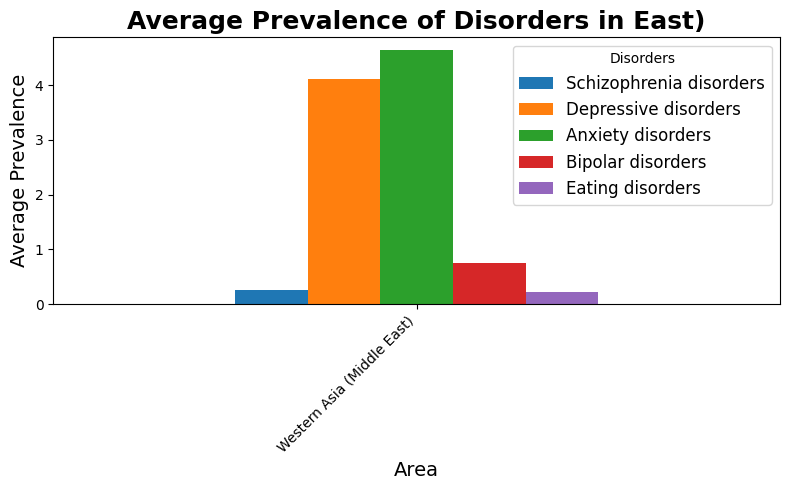

In [121]:
# Grouping the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']].mean()

# Getting unique area types
area_types = plotdata.index.str.split().str[-1].unique()

# Plotting for each area type
for area_type in area_types:
    area_subset = plotdata[plotdata.index.str.endswith(area_type)]
    area_subset.plot(kind="bar", figsize=(8, 5))
    plt.title(f'Average Prevalence of Disorders in {area_type}', fontsize=18, weight='bold')
    plt.xlabel('Area', fontsize=14)
    plt.ylabel('Average Prevalence', fontsize=14)
    plt.legend(title='Disorders', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 9 - Macroareas

In [122]:
# unique values entity df1
unique_areas = df1['Area'].unique()
print("Unique values of 'Area':")
print(unique_areas)

area_counts = df1['Area'].value_counts()  # Count the unique values of 'Entity'

# Print the counts
print("Counts of unique values of 'Area':")
print(area_counts)

Unique values of 'Area':
['South Asia' nan 'Southern Europe' 'Northern Africa' 'Polynesia'
 'Central Africa' 'Caribbean' 'South America' 'Western Asia (Middle East)'
 'Oceania' 'Western Europe' 'Eastern Europe' 'Central America'
 'Western Africa' 'Northern America' 'Southern Africa' 'Southeast Asia'
 'Eastern Africa' 'Eastern Asia' 'Northern Europe' 'Melanesia'
 'Micronesia' 'Central Asia']
Counts of unique values of 'Area':
Area
Western Asia (Middle East)    570
Eastern Africa                540
Western Africa                480
Southern Europe               450
Caribbean                     390
South America                 360
Southeast Asia                330
Northern Europe               300
Eastern Europe                300
Central America               270
Central Africa                270
South Asia                    240
Western Europe                210
Polynesia                     210
Eastern Asia                  210
Northern Africa               180
Micronesia            

In [123]:
# Create a dictionary mapping each entity to its corresponding area
macroarea_mapping = {
    "Africa": ["Northern Africa", "Western Africa", "Central Africa", "Eastern Africa", "Southern Africa"],
    "Asia": ["Central Asia", "Eastern Asia", "South Asia", "Southeast Asia", "Western Asia (Middle East)"],
    "Europe": ["Northern Europe", "Western Europe", "Southern Europe", "Eastern Europe"],
    "America": ["Caribbean", "Central America", "Northern America", "South America"],
    "Oceania": ["Oceania", "Melanesia", "Micronesia", "Polynesia"]
}

In [124]:
# Create the reverse mapping dictionary
reverse_macroarea_mapping = {}

# Iterate through the macroarea_mapping dictionary
for macroarea, areas in macroarea_mapping.items():
    # Iterate through the macroarea in each macroareas
    for area in areas:
        # Add the entity as a key and the macroarea as a value to the reverse mapping dictionary
        reverse_macroarea_mapping[area] = macroarea

# Now you can apply the reverse mapping to the DataFrame
df1['MacroArea'] = df1['Area'].map(reverse_macroarea_mapping)

# Print the first few rows of df1 to verify the mapping
print(df1.head())

        Entity  Year  Schizophrenia disorders  Depressive disorders  \
0  Afghanistan  1990                 0.223206              4.996118   
1  Afghanistan  1991                 0.222454              4.989290   
2  Afghanistan  1992                 0.221751              4.981346   
3  Afghanistan  1993                 0.220987              4.976958   
4  Afghanistan  1994                 0.220183              4.977782   

   Anxiety disorders  Bipolar disorders  Eating disorders        Area  \
0           4.713314           0.703023          0.127700  South Asia   
1           4.702100           0.702069          0.123256  South Asia   
2           4.683743           0.700792          0.118844  South Asia   
3           4.673549           0.700087          0.115089  South Asia   
4           4.670810           0.699898          0.111815  South Asia   

  MacroArea  
0      Asia  
1      Asia  
2      Asia  
3      Asia  
4      Asia  


In [125]:
df1.isna().sum()

Entity                       0
Year                         0
Schizophrenia disorders      0
Depressive disorders         0
Anxiety disorders            0
Bipolar disorders            0
Eating disorders             0
Area                       300
MacroArea                  300
dtype: int64

In [126]:
# Drop rows where 'Entity' column contains the specified categories
categories_to_drop = ['Africa (IHME GBD)', 'America (IHME GBD)', 'Asia (IHME GBD)',
    'Europe (IHME GBD)', 'European Union (27)', 'High-income countries',
    'Low-income countries', 'Lower-middle-income countries',
    'Upper-middle-income countries', 'World']
filtered_df1 = df1[~df1['Entity'].isin(categories_to_drop)]

# Print the filtered DataFrame
print(filtered_df1)

           Entity  Year  Schizophrenia disorders  Depressive disorders  \
0     Afghanistan  1990                 0.223206              4.996118   
1     Afghanistan  1991                 0.222454              4.989290   
2     Afghanistan  1992                 0.221751              4.981346   
3     Afghanistan  1993                 0.220987              4.976958   
4     Afghanistan  1994                 0.220183              4.977782   
...           ...   ...                      ...                   ...   
6415     Zimbabwe  2015                 0.201042              3.407624   
6416     Zimbabwe  2016                 0.201319              3.410755   
6417     Zimbabwe  2017                 0.201639              3.411965   
6418     Zimbabwe  2018                 0.201976              3.406929   
6419     Zimbabwe  2019                 0.202482              3.395476   

      Anxiety disorders  Bipolar disorders  Eating disorders            Area  \
0              4.713314        

In [127]:
filtered_df1.isna().sum()

Entity                     0
Year                       0
Schizophrenia disorders    0
Depressive disorders       0
Anxiety disorders          0
Bipolar disorders          0
Eating disorders           0
Area                       0
MacroArea                  0
dtype: int64

In [128]:
filtered_df1

,Entity,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders,Area,MacroArea
0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700,South Asia,Asia
1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256,South Asia,Asia
2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844,South Asia,Asia
3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089,South Asia,Asia
4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815,South Asia,Asia
...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,2015,0.201042,3.407624,3.184012,0.538596,0.095652,Eastern Africa,Africa
6416,Zimbabwe,2016,0.201319,3.410755,3.187148,0.538593,0.096662,Eastern Africa,Africa
6417,Zimbabwe,2017,0.201639,3.411965,3.188418,0.538589,0.097330,Eastern Africa,Africa
6418,Zimbabwe,2018,0.201976,3.406929,3.172111,0.538585,0.097909,Eastern Africa,Africa


# 9.1 - MacroArea Plots

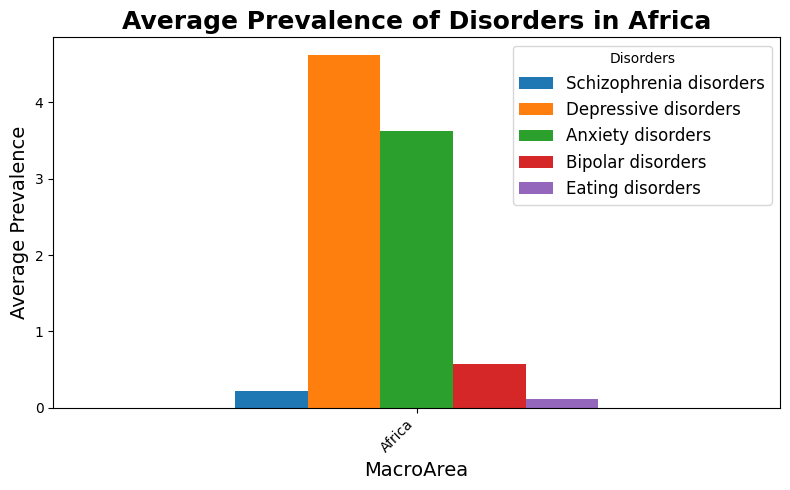

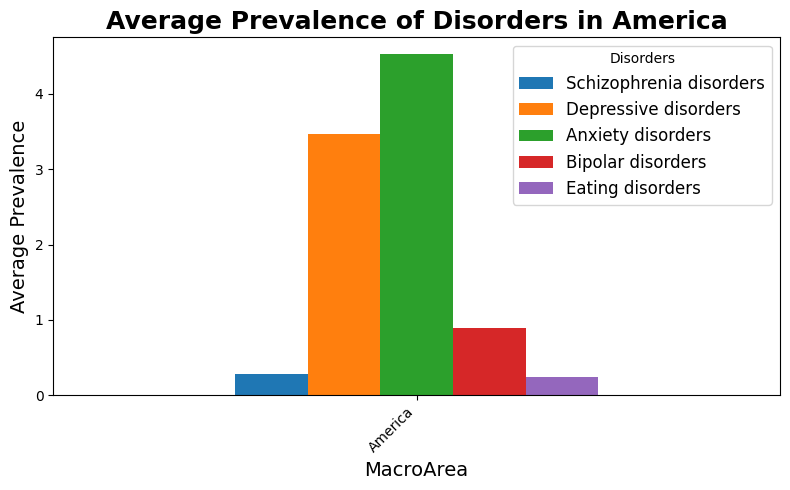

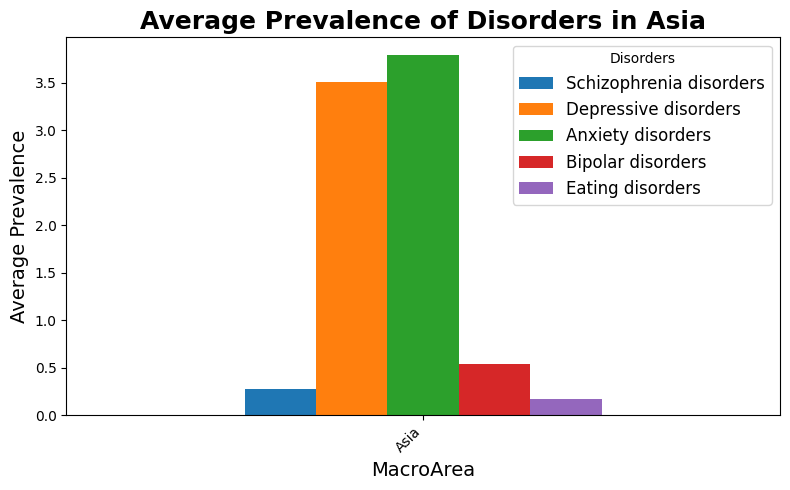

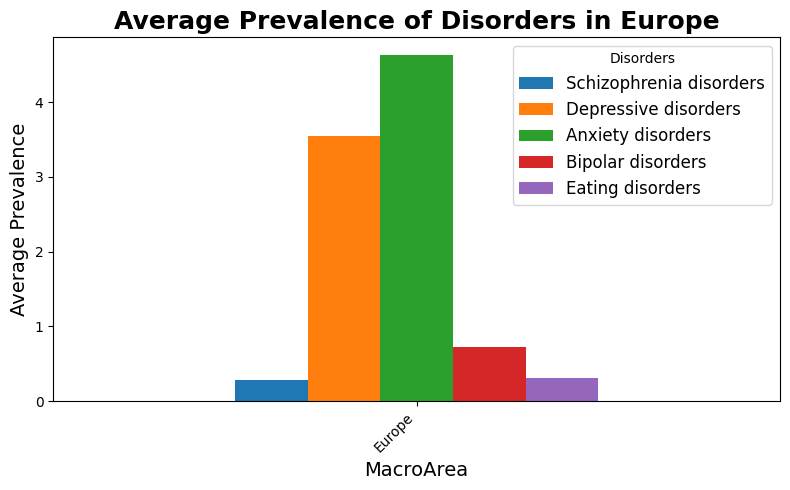

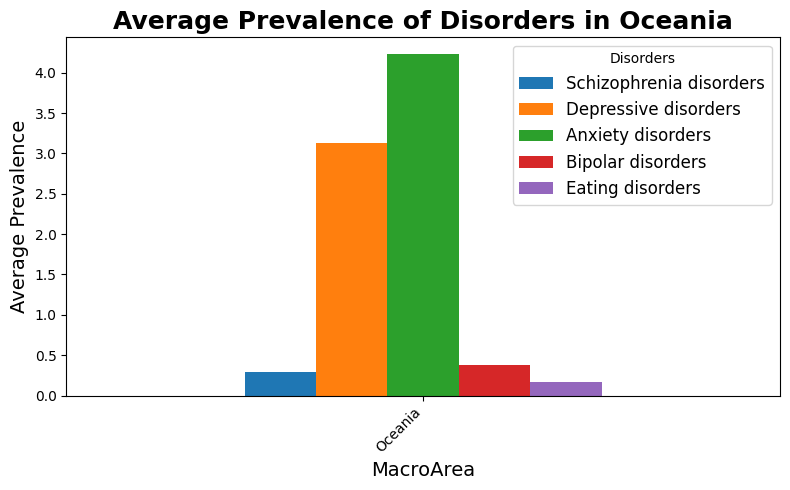

In [129]:
# Grouping the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']].mean()

# Getting unique area types
macroarea_types = plotdata.index.str.split().str[-1].unique()

# Plotting for each area type
for macroarea_type in macroarea_types:
    macroarea_subset = plotdata[plotdata.index.str.endswith(macroarea_type)]
    macroarea_subset.plot(kind="bar", figsize=(8, 5))
    plt.title(f'Average Prevalence of Disorders in {macroarea_type}', fontsize=18, weight='bold')
    plt.xlabel('MacroArea', fontsize=14)
    plt.ylabel('Average Prevalence', fontsize=14)
    plt.legend(title='Disorders', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 10 - Comparison between Areas and Macroareas - Univariate analysis

## 10.1 - Areas

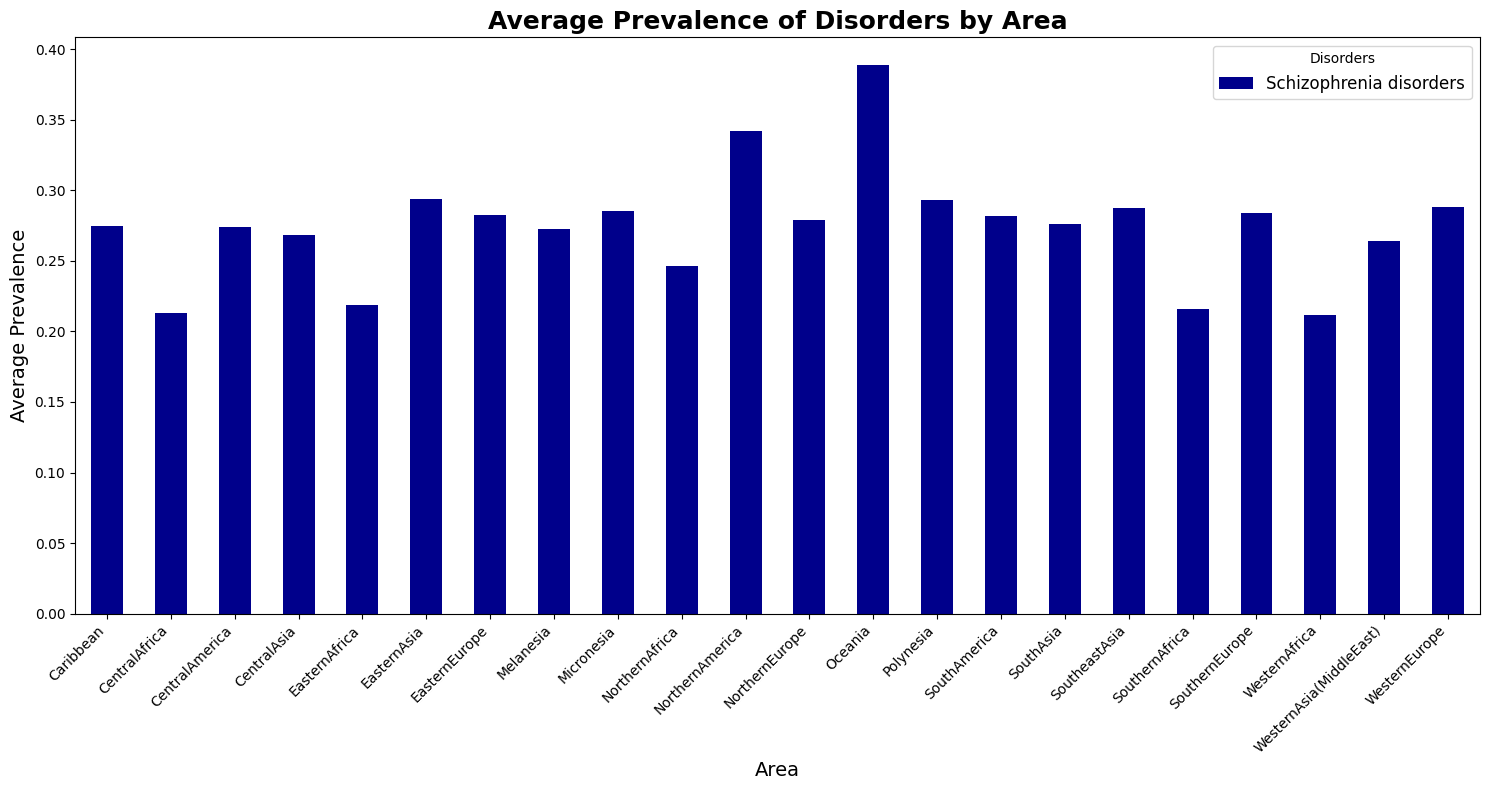

In [160]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Schizophrenia disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'darkblue')
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

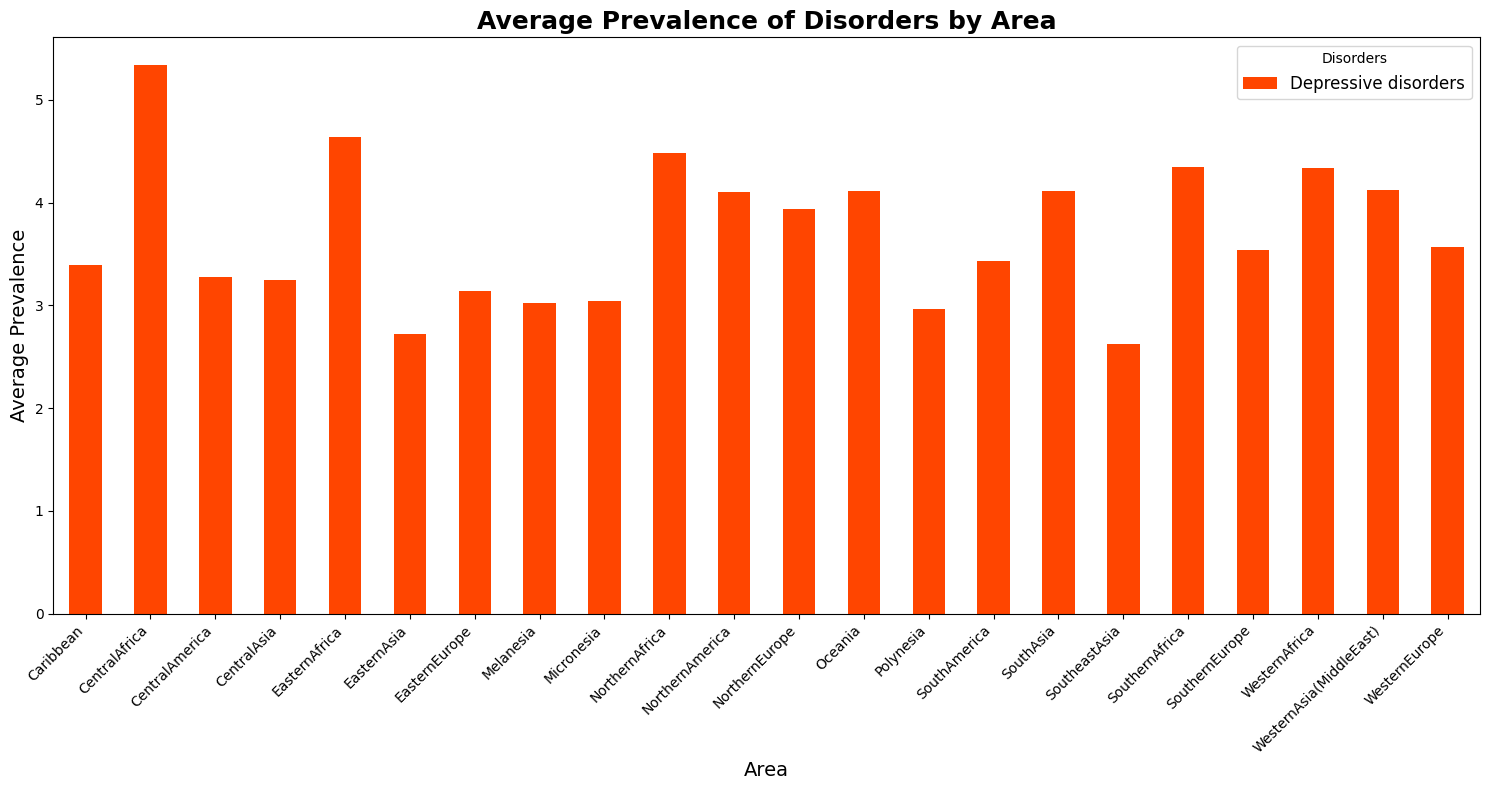

In [161]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Depressive disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'orangered')
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

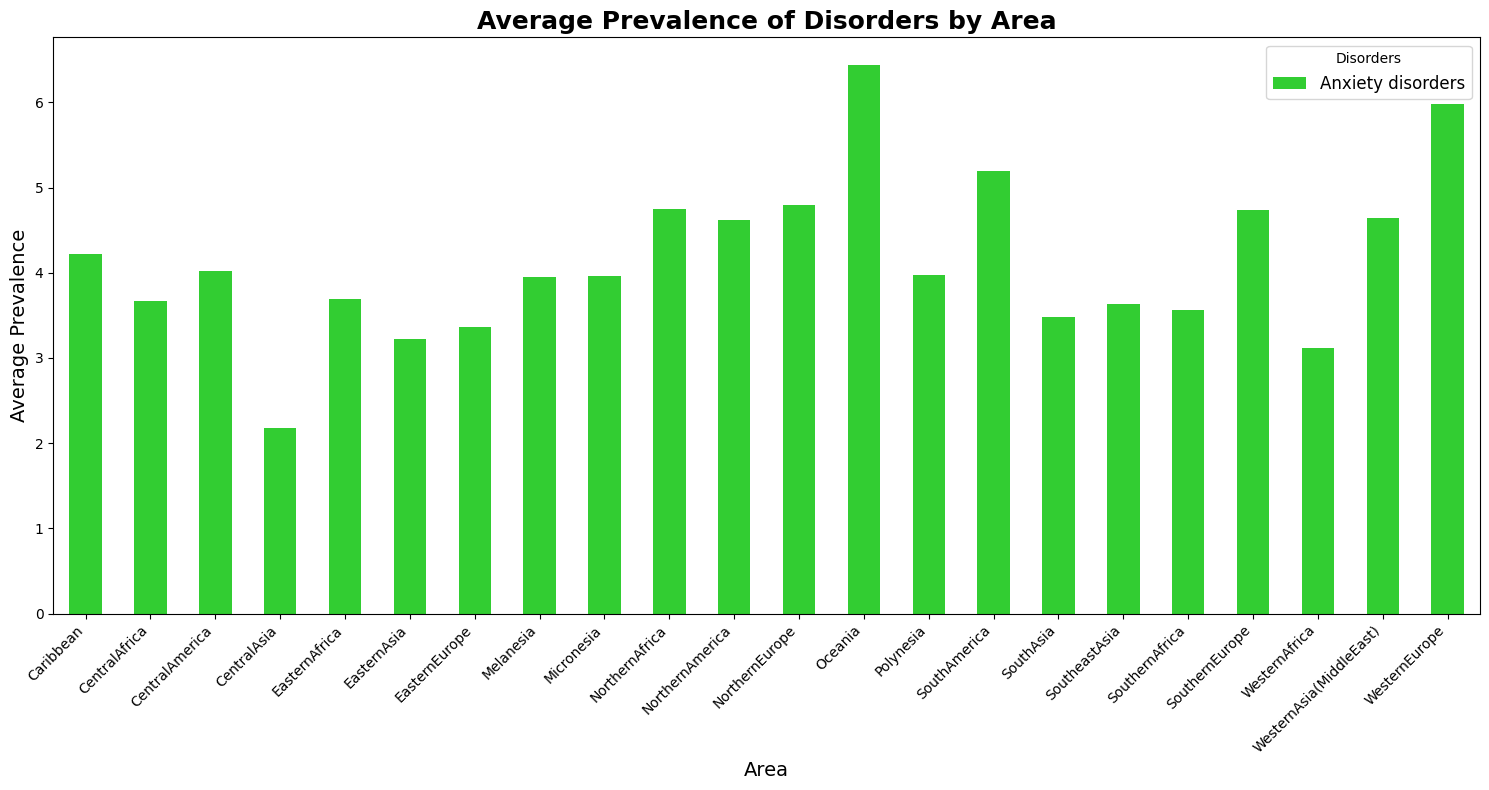

In [162]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Anxiety disorders',]].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'limegreen')
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

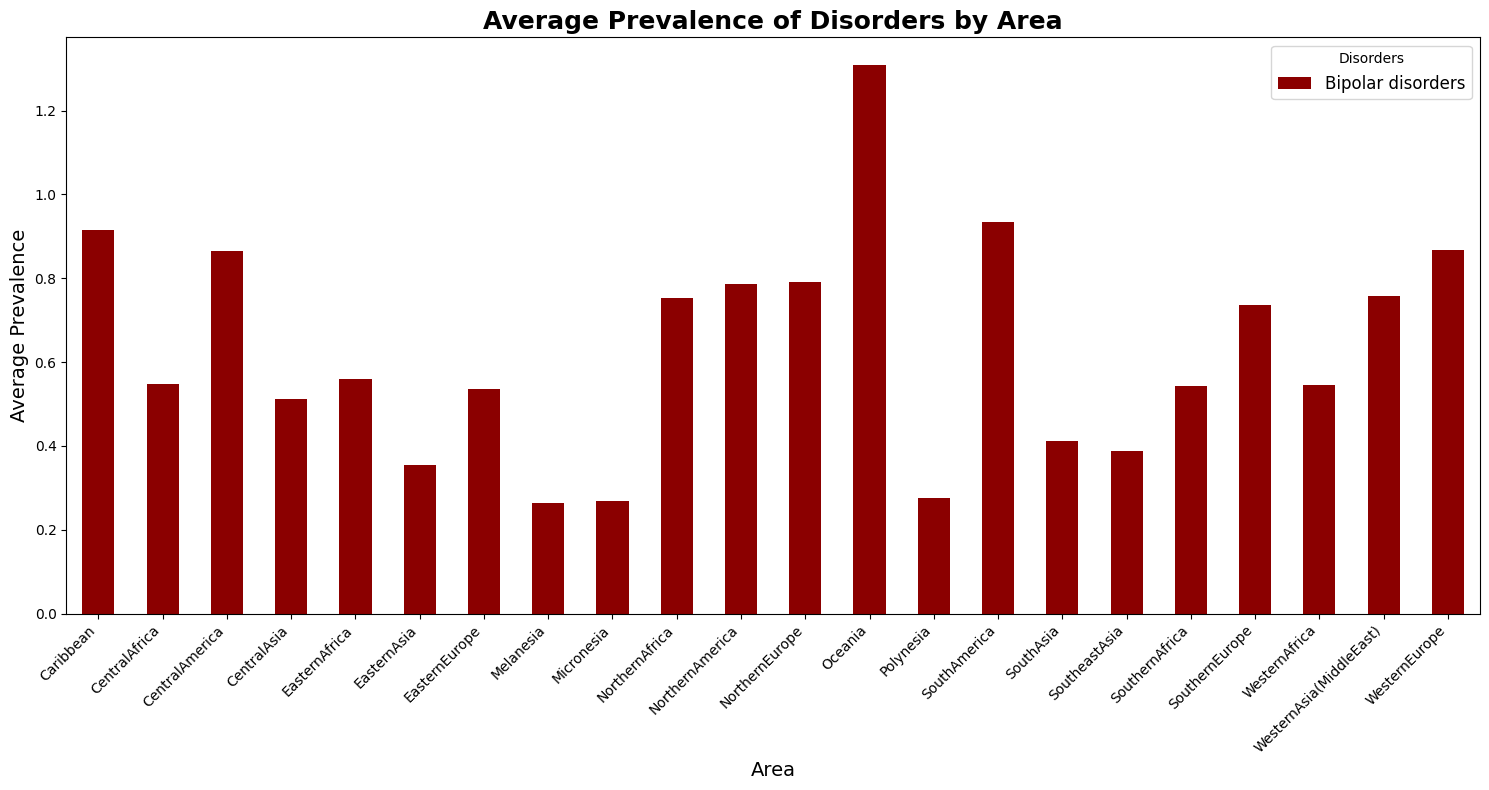

In [163]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Bipolar disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'darkred')
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

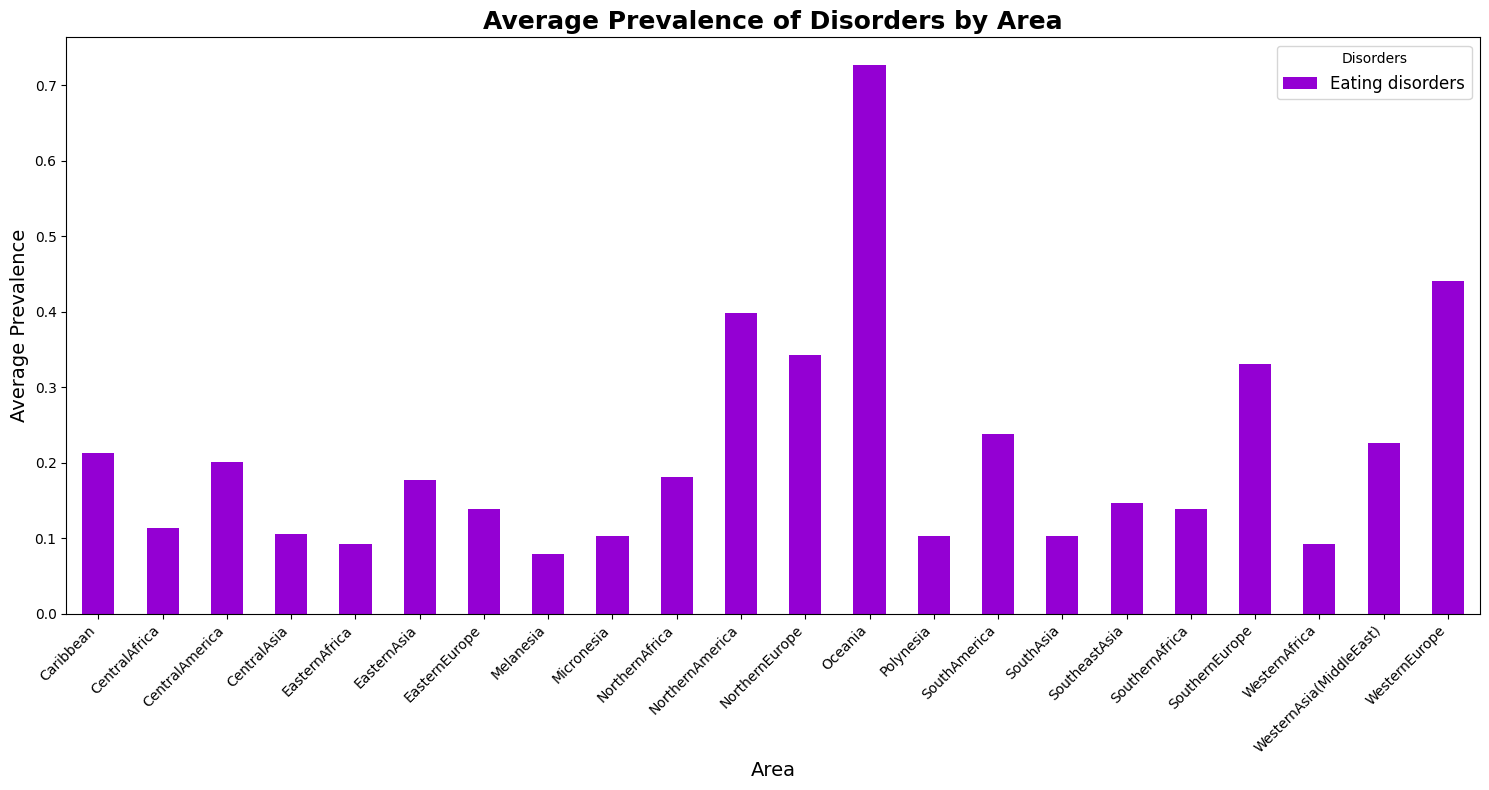

In [165]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Eating disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'darkviolet')
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 10.2 - Macroareas

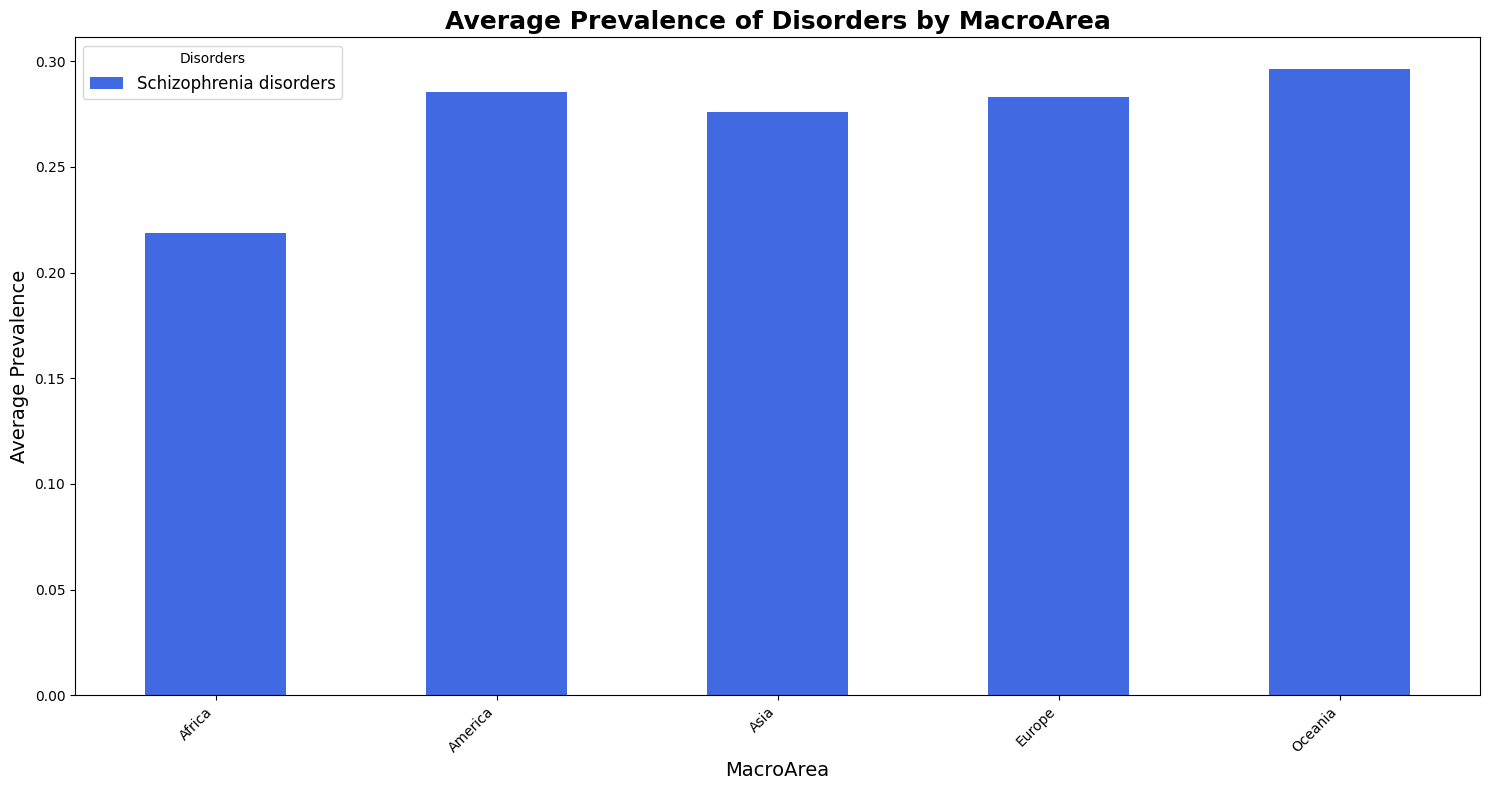

In [135]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Schizophrenia disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'royalblue')
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

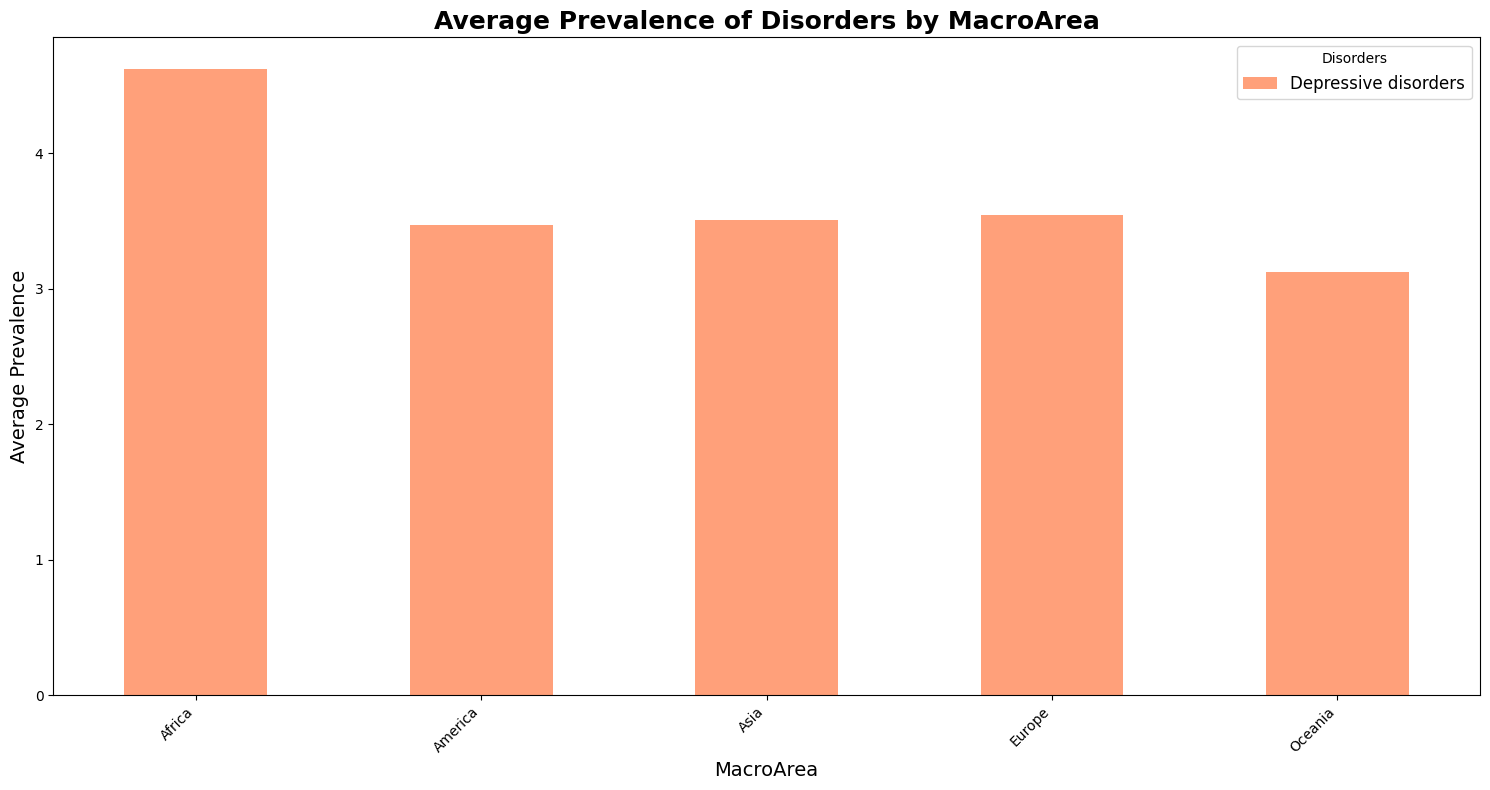

In [168]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Depressive disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'lightsalmon')
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

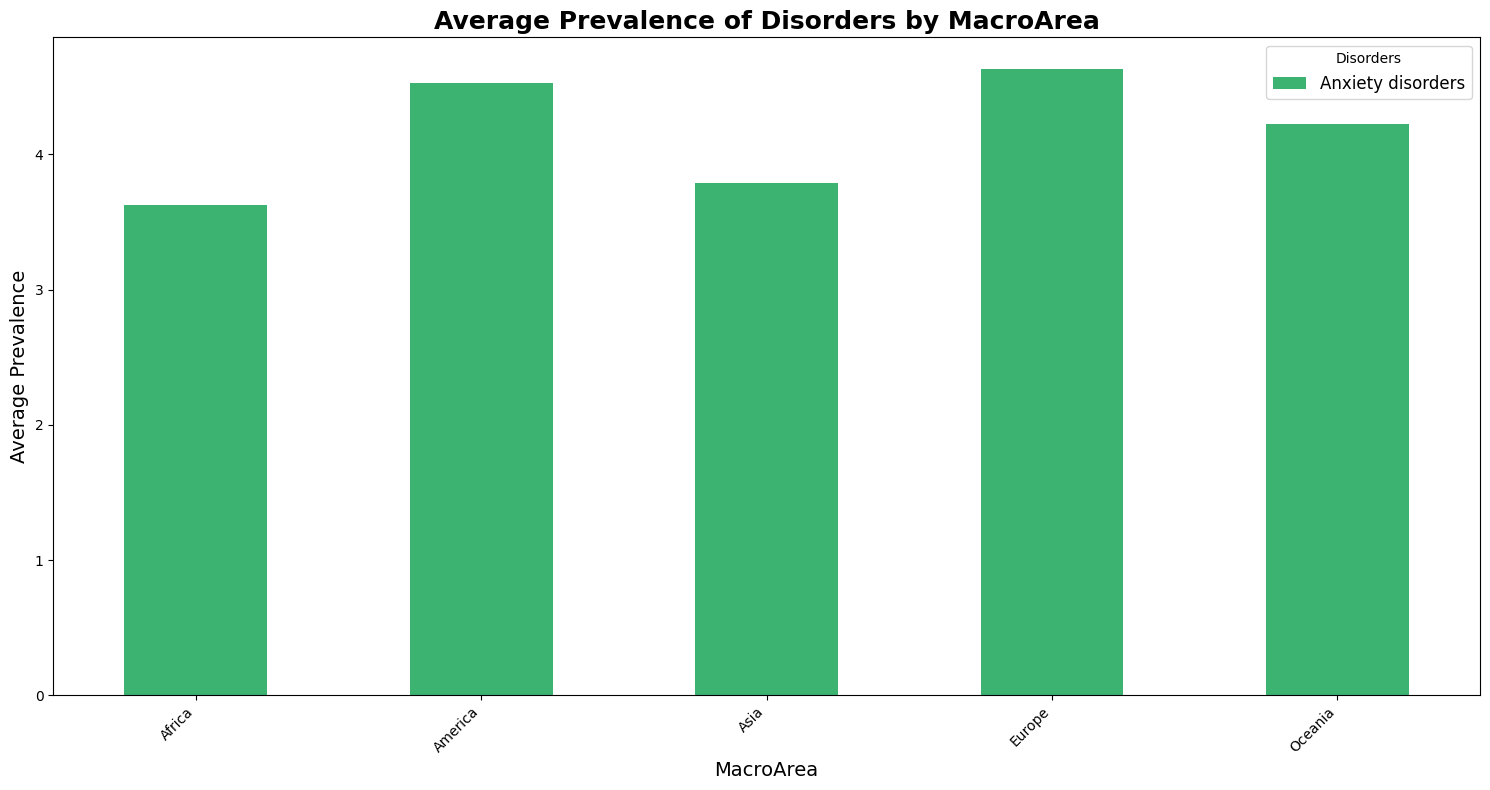

In [169]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Anxiety disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'mediumseagreen')
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

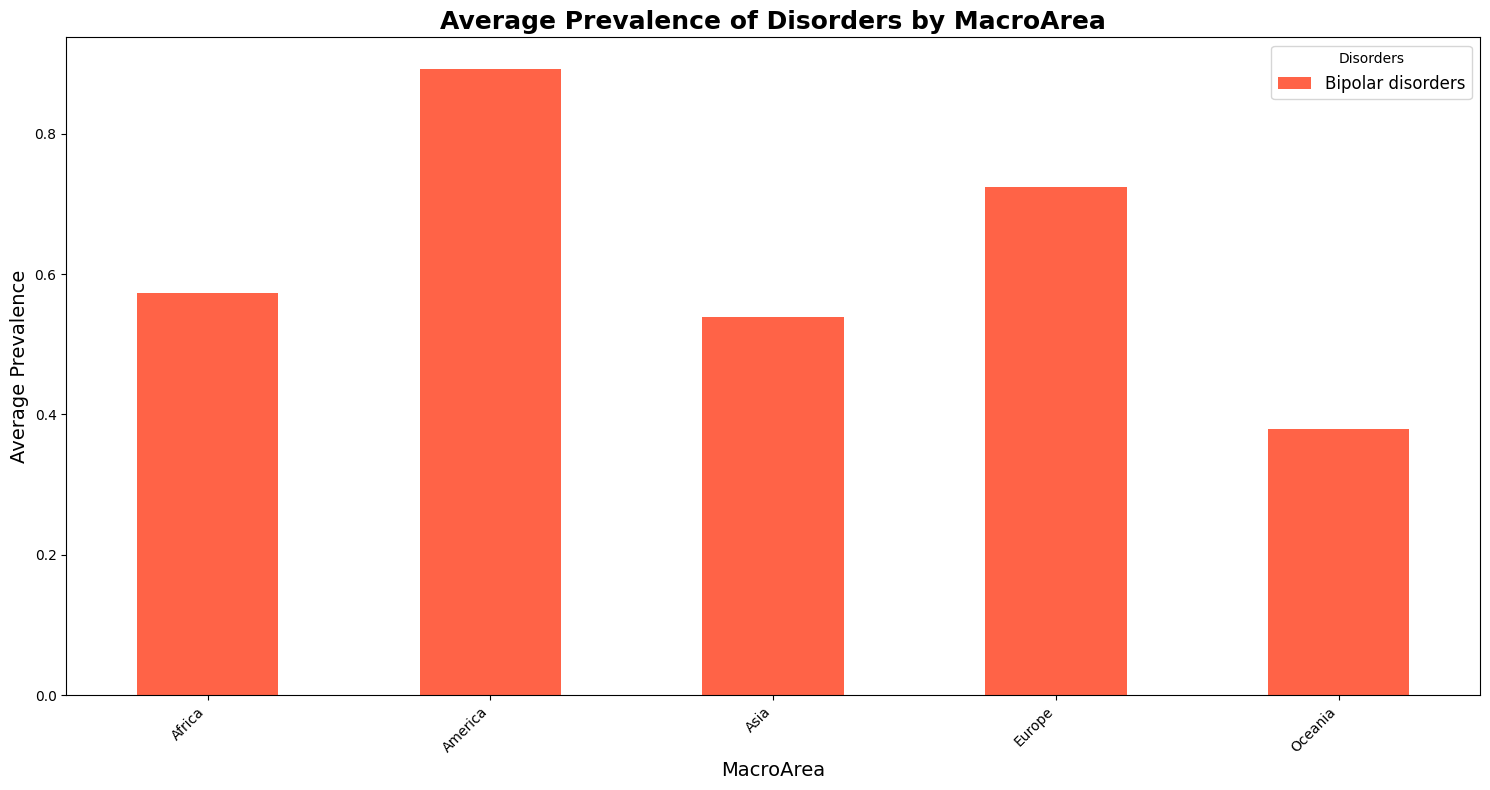

In [138]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Bipolar disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'tomato')
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

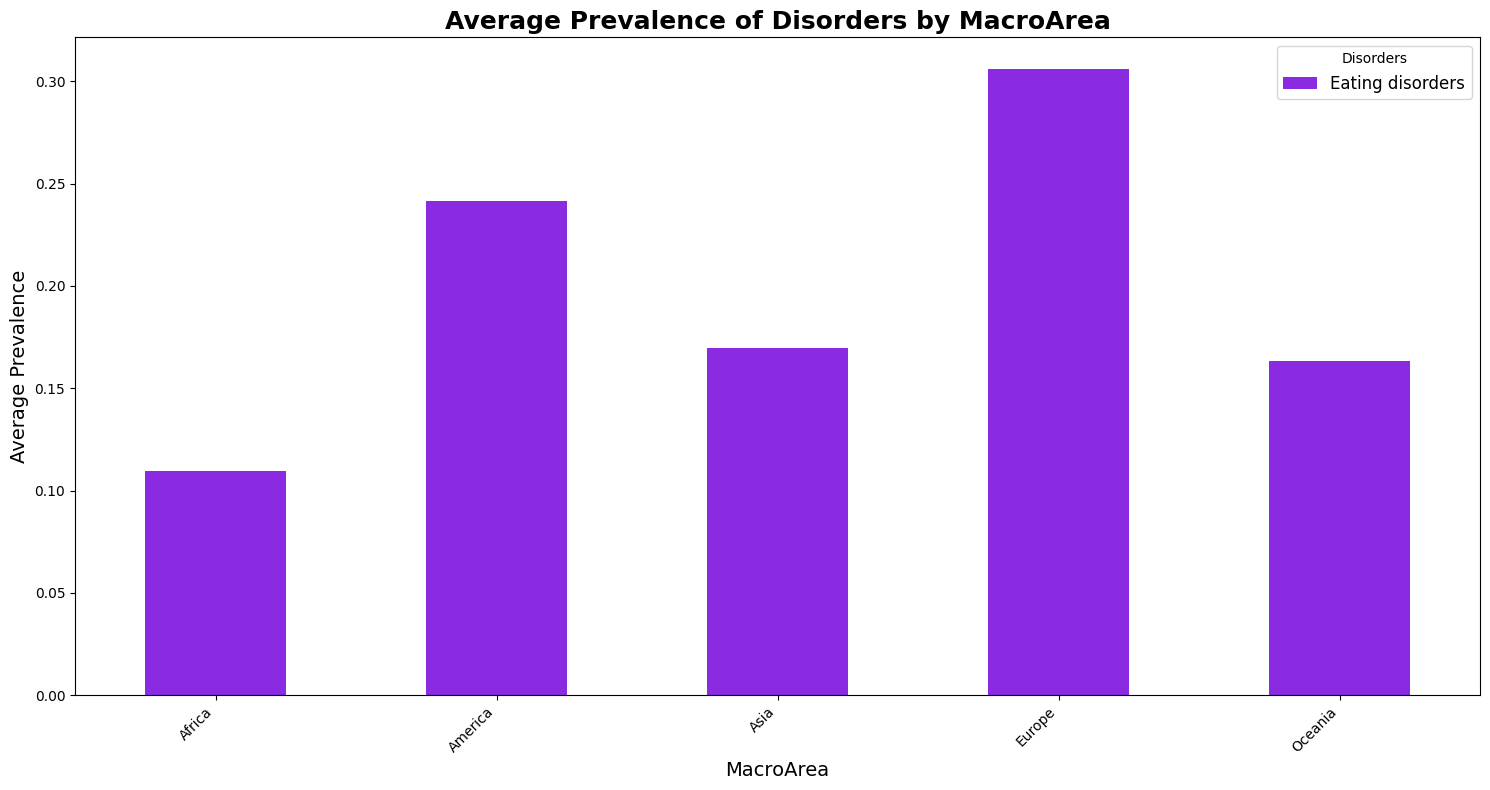

In [139]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Eating disorders']].mean()

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color = 'blueviolet')
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 11 - Comparison between Areas and Macroareas - Bivariate analysis

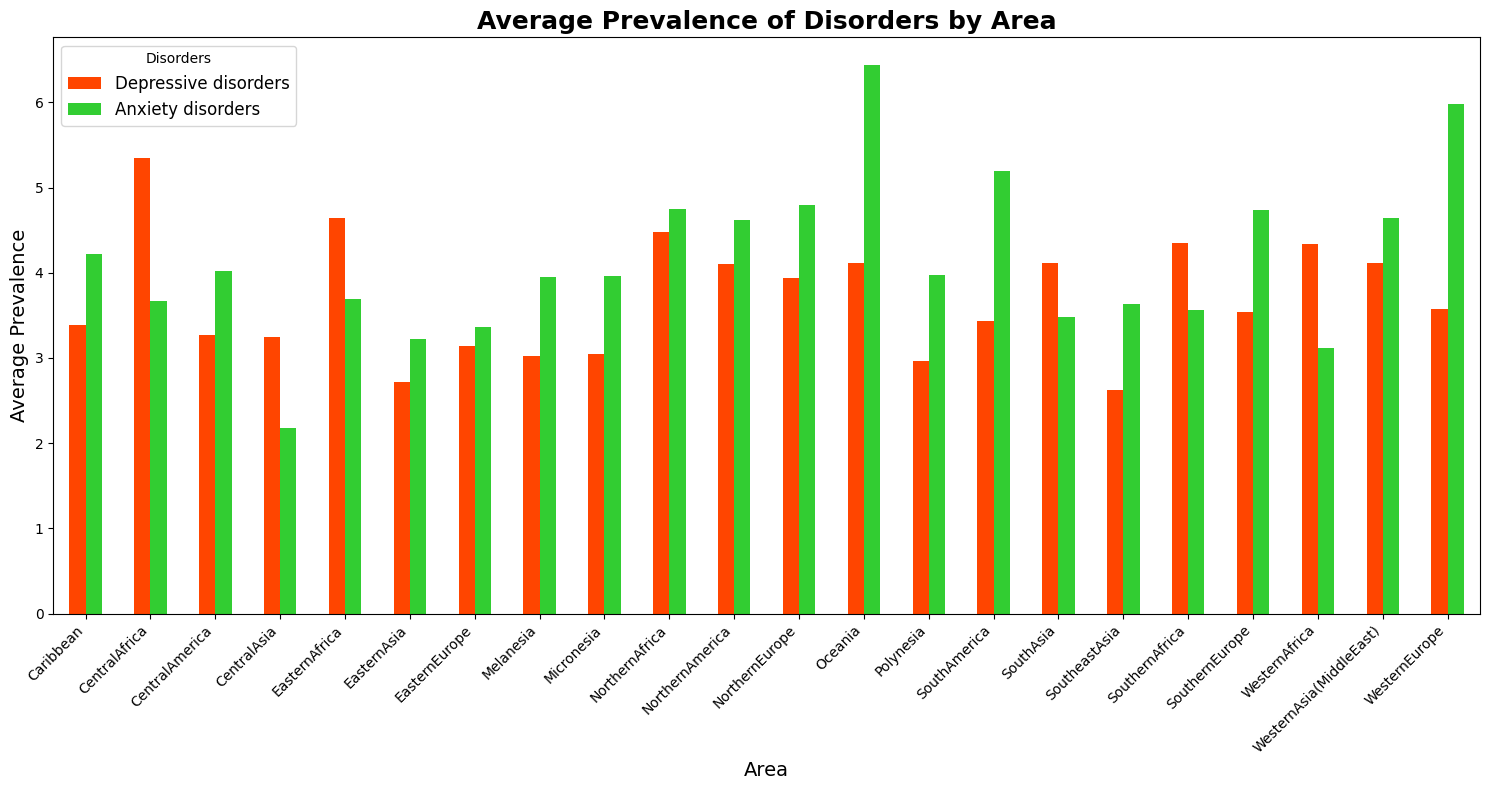

In [166]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Depressive disorders', 'Anxiety disorders']].mean()
# Define the colors for each disorder
colors = ['orangered', 'limegreen']

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color=colors)
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

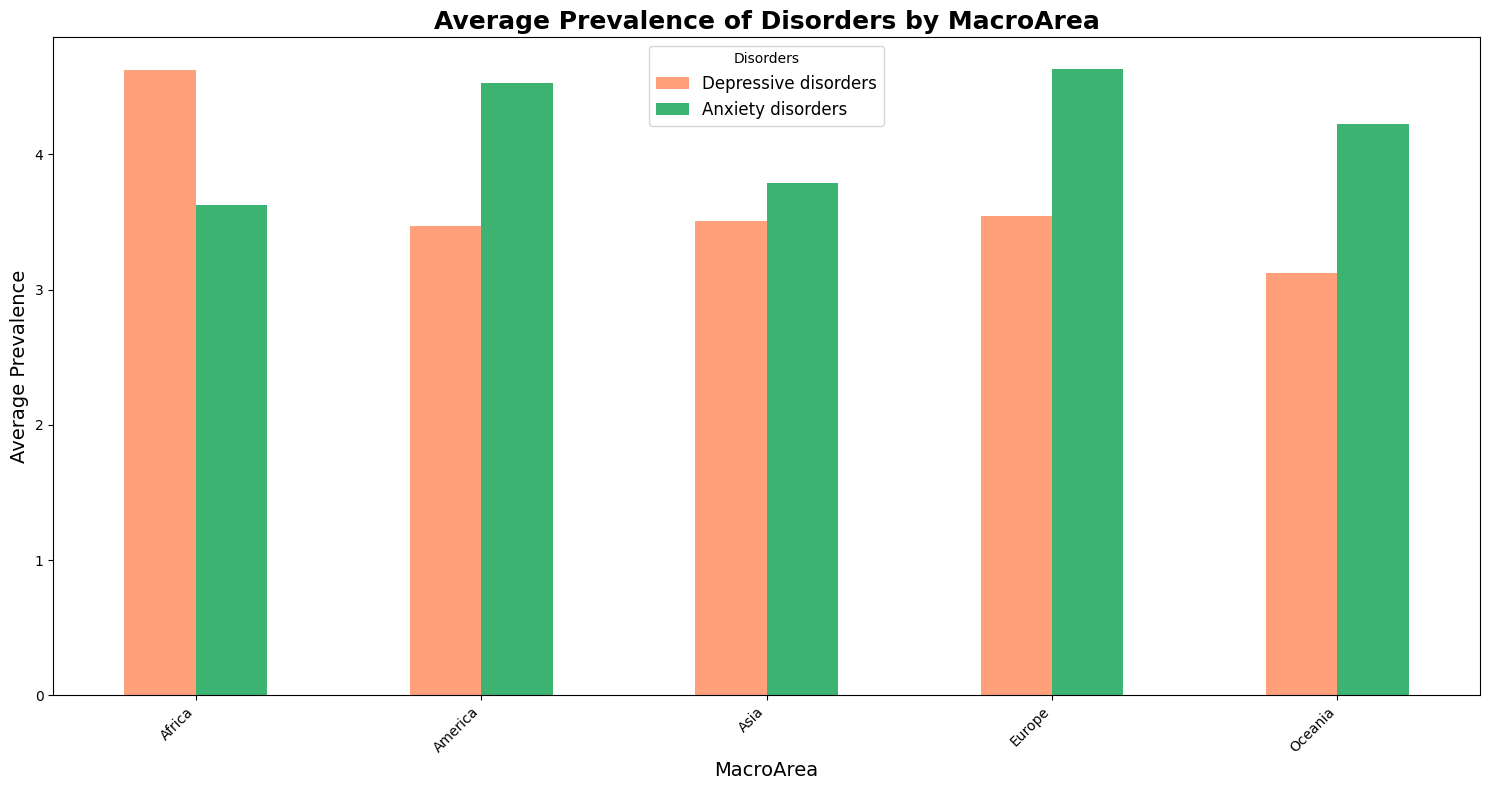

In [170]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Depressive disorders', 'Anxiety disorders']].mean()

# Define the colors for each disorder
colors = ['lightsalmon', 'mediumseagreen']

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color=colors)
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 12 - Comparison between Areas and Macroareas - Trivariate analysis


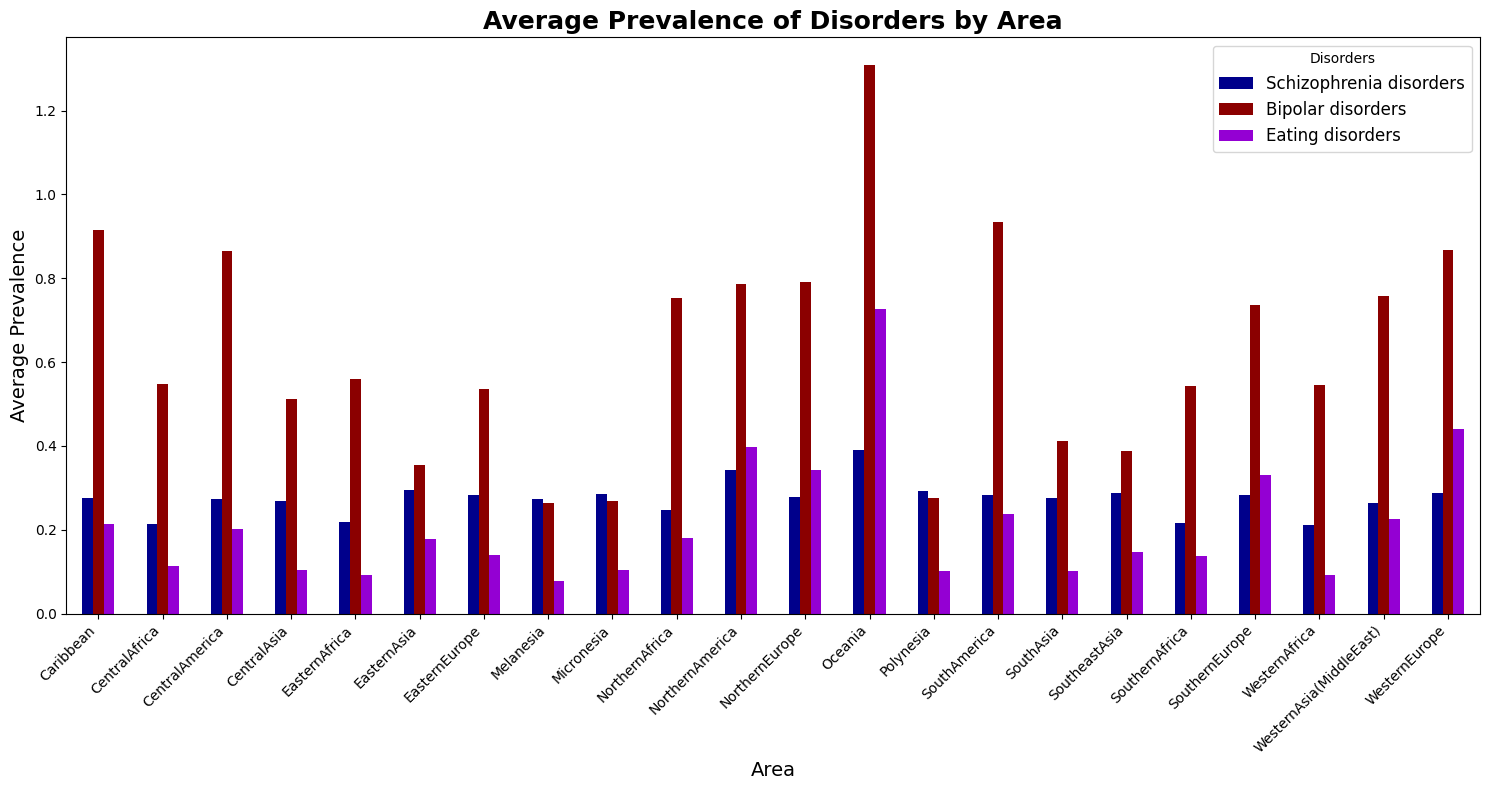

In [167]:
# Remove spaces from area names
filtered_df1['Area'] = filtered_df1['Area'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('Area')[['Schizophrenia disorders', 'Bipolar disorders', 'Eating disorders']].mean()
# Define the colors for each disorder
colors = ['darkblue', 'darkred', 'darkviolet']

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color=colors)
plt.title('Average Prevalence of Disorders by Area', fontsize=18, weight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

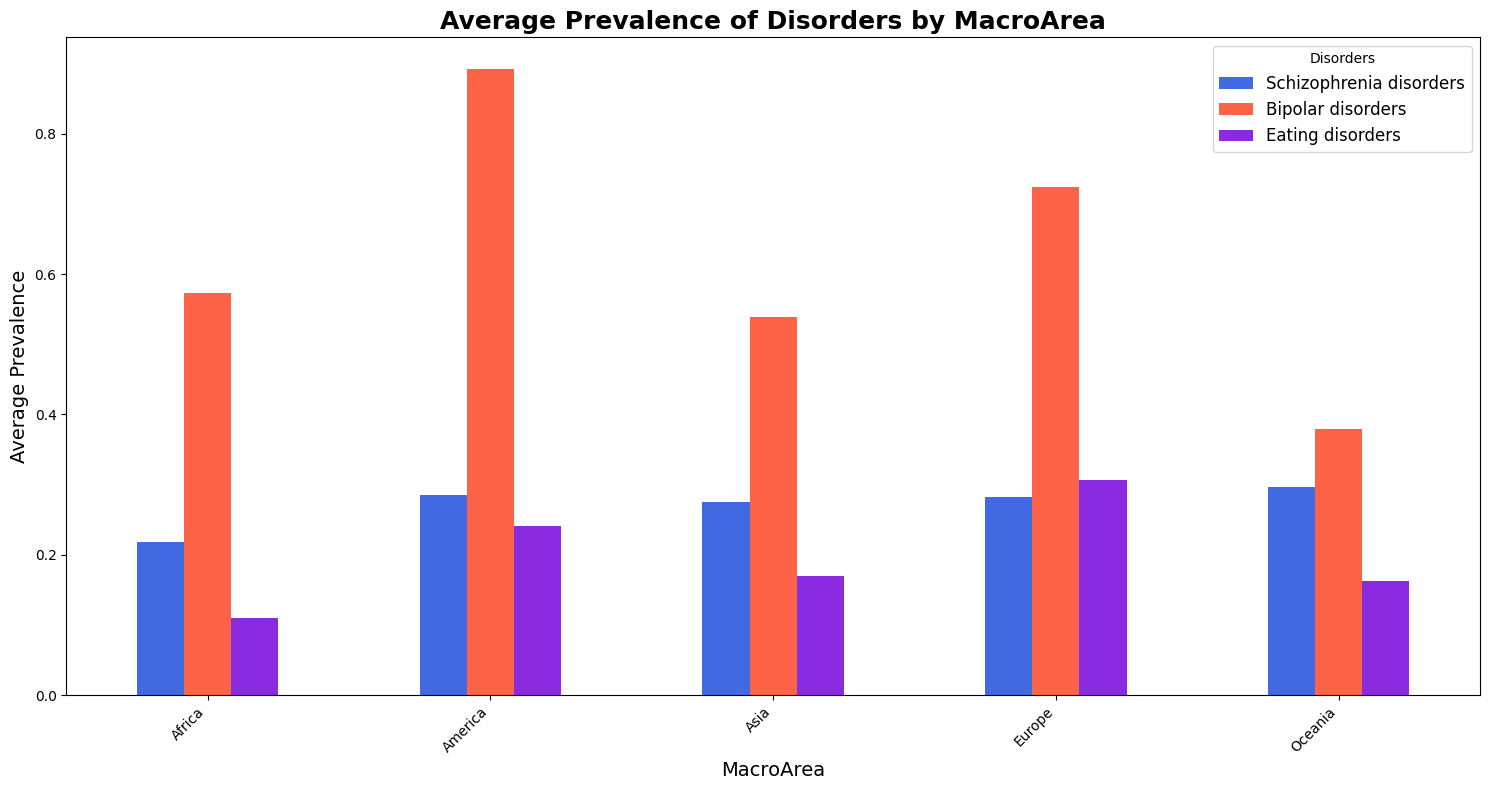

In [158]:
# Remove spaces from area names
filtered_df1['MacroArea'] = filtered_df1['MacroArea'].str.replace(' ', '')

# Group the data by 'Area' and calculate the mean for each disorder
plotdata = filtered_df1.groupby('MacroArea')[['Schizophrenia disorders', 'Bipolar disorders', 'Eating disorders']].mean()

# Define the colors for each disorder
colors = ['royalblue', 'tomato', 'blueviolet']

# Plotting
plotdata.plot(kind="bar", figsize=(15, 8), color=colors)
plt.title('Average Prevalence of Disorders by MacroArea', fontsize=18, weight='bold')
plt.xlabel('MacroArea', fontsize=14)
plt.ylabel('Average Prevalence', fontsize=14)
plt.legend(title='Disorders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()